# Assignment 5

## Question 1 : K-Means Clustering

### data preprocessing

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
import random
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [2]:
football_df=pd.read_csv("football_data.csv")

In [3]:
football_df=football_df.drop("ID",axis=1)
football_df=football_df.drop("Unnamed: 0",axis=1)
football_df=football_df.drop("Name",axis=1)
football_df=football_df.drop("Jersey Number",axis=1)
football_df=football_df.drop("Unnamed: 60",axis=1)

In [4]:
football_df=football_df.drop("Joined",axis=1)
football_df=football_df.drop("Loaned From",axis=1)

In [5]:
football_df['nation_no']=football_df['Nationality'].astype('category').cat.codes
football_df['club_no']=football_df['Club'].astype('category').cat.codes
football_df['position_no']=football_df['Position'].astype('category').cat.codes

In [6]:
football_df=football_df.drop("Nationality",axis=1)
football_df=football_df.drop("Club",axis=1)
football_df=football_df.drop("Position",axis=1)

In [7]:
football_df['Value']=football_df['Value'].str.replace('€','')
football_df['Value']=football_df['Value'].str.replace('.','')
football_df['Value']=football_df['Value'].str.replace('M','000000')
football_df['Value']=football_df['Value'].str.replace('K','000')
football_df=football_df[football_df['Value'].str.contains('[a-zA-Z]')==False]
football_df['Value']=pd.to_numeric(football_df['Value'])

/tmp/ipykernel_23238/2667930555.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  football_df['Value']=football_df['Value'].str.replace('.','')


In [8]:
football_df['Wage']=football_df['Wage'].str.replace('€','')
football_df['Wage']=football_df['Wage'].str.replace('K','000')
football_df=football_df[football_df['Wage'].str.contains('[a-zA-Z]')==False]
football_df['Wage']=pd.to_numeric(football_df['Wage'])

In [9]:
football_df=football_df.drop("Special",axis=1)
football_df=football_df.drop("Contract Valid Until",axis=1)
football_df=football_df.drop("Body Type",axis=1)

In [10]:
football_df['Height']=football_df['Height'].str.replace("'",".")
football_df['Height']=pd.to_numeric(football_df['Height'])
football_df['Weight']=football_df['Weight'].str.replace("lbs","")
football_df['Weight']=pd.to_numeric(football_df['Weight'])
football_df['Preferred Foot']=football_df['Preferred Foot'].astype('category').cat.codes

In [11]:
football_df['International Reputation']=football_df['International Reputation'].astype('category').cat.codes

In [12]:
football_df=football_df.drop("Work Rate",axis=1)
football_df=football_df.drop("Release Clause",axis=1)
football_df=football_df.drop("Real Face",axis=1)
football_df['Crossing']=pd.to_numeric(football_df['Crossing'])

In [13]:
football_df=football_df.dropna()

In [14]:
football_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18131 entries, 0 to 18206
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18131 non-null  int64  
 1   Overall                   18131 non-null  int64  
 2   Potential                 18131 non-null  int64  
 3   Value                     18131 non-null  int64  
 4   Wage                      18131 non-null  int64  
 5   Preferred Foot            18131 non-null  int8   
 6   International Reputation  18131 non-null  int8   
 7   Weak Foot                 18131 non-null  float64
 8   Skill Moves               18131 non-null  float64
 9   Height                    18131 non-null  float64
 10  Weight                    18131 non-null  float64
 11  Crossing                  18131 non-null  float64
 12  Finishing                 18131 non-null  float64
 13  HeadingAccuracy           18131 non-null  float64
 14  ShortP

In [15]:
football=football_df.to_numpy()

### KMeans algorithm function

In [23]:
def KMeans(data_array,k,max_iterations):
    # data_array=data.to_numpy()
    number_samples=data_array.shape[0]
    number_features=data_array.shape[1]
    centroid_index=random.sample(range(number_samples),k)
    centroids=data_array[centroid_index]
    centroids=np.array(centroids)
    # print(centroids)
    Clusters=[]
    for i in range(k):
        Clusters.append([])

    for _ in range(max_iterations):
        # print(_)
        old_centroids=centroids.copy()
        
        for i in range(number_samples):
            closest_centroid = np.argmin(np.sqrt(np.sum((data_array[i]-centroids)**2, axis=1)))
            Clusters[closest_centroid].append(i)

        # print(np.nanmean(data_array[Clusters[0]],axis=0))

        for i in range(k):
            
            centroids[i]=np.average(data_array[Clusters[i]],axis=0)

        # print(old_centroids-centroids)
        # diff=old_centroids-centroids

        # print(centroids)
        # print(old_centroids)

        if np.equal(old_centroids,centroids).all():
            print(_)
            break

    closest_centroid=np.zeros(number_samples)

    for i in range(number_samples):
        closest_centroid[i]=np.argmin(np.sqrt(np.sum((data_array[i]-centroids)**2, axis=1)))

    return closest_centroid,centroids

    # print(centroids)

In [17]:
football_features=football_df[['Age','Overall','Value']]
football_features=football_features.to_numpy()
Clusters=KMeans(football_features,6,10)

### Silhouette score and Elbow method

In [18]:
from sklearn.metrics import silhouette_score

In [19]:
k=4
silho=np.zeros(6)
for i in range(6):
    Clusters=KMeans(football_features,k,10)
    silho[i]=silhouette_score(football_features,Clusters)
    print("k=",k,"silhouette_score=",silho[i],"\n")
    k+=2

k= 4 silhouette_score= 0.4413564028479057 

k= 6 silhouette_score= 0.45345780552436404 

k= 8 silhouette_score= 0.489310818797552 

k= 10 silhouette_score= 0.48078415108514316 

k= 12 silhouette_score= 0.48946019717328654 

k= 14 silhouette_score= 0.4608854707562916 



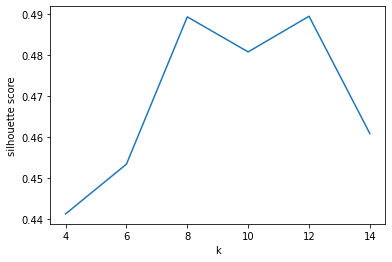

In [21]:
plt.plot([4,6,8,10,12,14],silho)
plt.xlabel("k")
plt.ylabel("silhouette score")
plt.show()

In [29]:
k=6
Clusters,centroids=KMeans(football_features,k,10)
intra_cluster_distance=np.mean(np.sqrt(np.sum((football_features-centroids[Clusters.astype(int)])**2, axis=1)))
print("intra_cluster_distance=",intra_cluster_distance)

intra_cluster_distance= 5897966.808593778


In [33]:
inter_cluster_distance=0
for i in range(k):
    for j in range(k):
        if i!=j:
            inter_cluster_distance_new=np.mean(np.sqrt(np.sum((centroids[i]-centroids[j])**2)))
            inter_cluster_distance=np.mean([inter_cluster_distance,inter_cluster_distance_new])

print("inter_cluster_distance=",inter_cluster_distance)

inter_cluster_distance= 11983045.413352117


In [37]:
for i in range(k):
    indices=np.where(Clusters==i)
    age=football_features[indices,0]
    print("average age of cluster",i,"=",np.mean(age))
    

average age of cluster 0 = 25.01704119850187
average age of cluster 1 = 25.886770518484074
average age of cluster 2 = 25.9503367003367
average age of cluster 3 = 26.572393822393824
average age of cluster 4 = 25.01469723691946
average age of cluster 5 = 23.424930167597765


In [38]:
for i in range(k):
    indices=np.where(Clusters==i)
    overall=football_features[indices,1]
    print("average overall of cluster",i,"=",np.mean(overall))

average overall of cluster 0 = 65.661797752809
average overall of cluster 1 = 71.49081608928157
average overall of cluster 2 = 77.3459595959596
average overall of cluster 3 = 74.67374517374517
average overall of cluster 4 = 61.8450911228689
average overall of cluster 5 = 57.113477653631286


In [39]:
for i in range(k):
    indices=np.where(Clusters==i)
    value=football_features[indices,2]
    print("average value of cluster",i,"=",np.mean(value))

average value of cluster 0 = 693263.1086142322
average value of cluster 1 = 22513136.4798884
average value of cluster 2 = 117508417.5084175
average value of cluster 3 = 6174710.424710425
average value of cluster 4 = 313043.79776602
average value of cluster 5 = 109682.2625698324


In [45]:
distance_matrix=np.zeros((k,k))
for i in range(k):
    for j in range(k):
        if i!=j:
            distance_matrix[i,j]=np.mean(np.sqrt(np.sum((centroids[i]-centroids[j])**2)))
distance_matrix=distance_matrix/np.max(distance_matrix)

In [46]:
from prettytable import PrettyTable
x=PrettyTable()
x.field_names=["Cluster 0","Cluster 1","Cluster 2","Cluster 3","Cluster 4","Cluster 5"]
for i in range(k):
    x.add_row(distance_matrix[i])
print(x)

+-----------------------+---------------------+--------------------+----------------------+-----------------------+-----------------------+
|       Cluster 0       |      Cluster 1      |     Cluster 2      |      Cluster 3       |       Cluster 4       |       Cluster 5       |
+-----------------------+---------------------+--------------------+----------------------+-----------------------+-----------------------+
|          0.0          | 0.22402890049578597 | 0.993794426057617  | 0.01969591569366409  |  0.003940387681270699 | 0.0062055739430525395 |
|  0.22402890049578597  |         0.0         | 0.7697655255618405 | 0.20433298480217316  |  0.22796928817687073  |  0.23023447443820422  |
|   0.993794426057617   |  0.7697655255618405 |        0.0         |  0.9740985103640125  |   0.9977348137386899  |          1.0          |
|  0.01969591569366409  | 0.20433298480217316 | 0.9740985103640125 |         0.0          |  0.023636303374835535 |  0.02590148963635273  |
|  0.003940387681270

* So, the main thing the clustering algorithm separated here is value of each player
* Cluster 5 consists of players with cheap value
* Cluster 4 consists of players with moderately cheap value
* Cluster 3 consists of players with moderate value
* Cluster 0 consists of players with moderately expensive value
* Cluster 1 consists of players with expensive value
* Cluster 2 consists of players with very expensive value and can be considered as outliers because they are present far away from other clusters
* As we can see from the table that cluster 2 has been placed far away from other clusters and has centroid to center distance of around 0.9 which is very high compared to other clusters. Hence, we can say that cluster 2 is an outlier.
* This is understandable because in football, there are only few top players which fall in this category and they are very expensive. whereas, there are many players who are cheap and moderately cheap. Hence, the clustering algorithm has separated them into different clusters.